In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('finalR.csv').drop(['home_country', 'away_country', 'away_year', 'home_year'], axis=1)

# Add avg goals statistic to dataset

In [14]:
def get_average_goals(home, away, year, ignore_sides=False):
    avg_home = 0
    avg_away = 0
    n = 0
    i = 0
    
    while i < len(df) and df["Year"][i] <= year:
        if (home.lower() in df["Home Team Name"][i].lower() and
            away.lower() in df["Away Team Name"][i].lower()):
                avg_home += df["Home Team Goals"][i]
                avg_away += df["Away Team Goals"][i]
                n+=1

        if ignore_sides:
            if (home.lower() in df["Away Team Name"][i].lower() and
                away.lower() in df["Home Team Name"][i].lower()):
                    avg_home += df["Away Team Goals"][i]
                    avg_away += df["Home Team Goals"][i]
                    n+=1
                
        i+=1

    if n > 0:
        return [
            avg_home/n,
            avg_away/n
        ]

    else:
        return False

In [15]:
home_avg_goals = []
away_avg_goals = []

for i in range(len(df)):
    home_team_name = df["Home Team Name"][i]
    away_team_name = df["Away Team Name"][i]

    avg_goals = get_average_goals(home_team_name, away_team_name, df["Year"][i]-1)
    if avg_goals:
        home_avg_goals.append(avg_goals[0])
        away_avg_goals.append(avg_goals[1])
    else:
        home_avg_goals.append(0.0)
        away_avg_goals.append(0.0)

In [17]:
df["Home Avg Goals"] = home_avg_goals
df["Away Avg Goals"] = away_avg_goals

In [19]:
df.tail()

,Away Team Goals,Away Team Name,Home Team Goals,Home Team Name,Year,home_rank,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,...,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,winning_team,RankDiff,Home Avg Goals,Away Avg Goals
1371,0.0,Panama,1.0,Denmark,2018.0,12,1098.82,1099,0,784.52,...,290.38,145.19,277.41,83.22,189.81,37.96,Denmark,-41,0.000000,0.000000
1372,1.0,Sweden,0.0,Denmark,2018.0,12,1098.82,1099,0,784.52,...,302.57,151.28,462.48,138.74,253.40,50.68,Sweden,-6,1.142857,1.142857
1373,0.0,Denmark,0.0,Sweden,2018.0,18,1000.44,998,0,659.74,...,289.97,144.99,310.70,93.21,380.53,76.11,Draw,6,0.666667,0.666667
1374,0.0,Saudi Arabia,4.0,Belgium,2018.0,5,1325.29,1325,0,626.00,...,324.72,162.36,384.56,115.37,122.58,24.52,Belgium,-60,2.000000,1.000000
1375,0.0,Portugal,0.0,Belgium,2018.0,5,1325.29,1325,0,626.00,...,617.85,308.92,635.88,190.76,570.26,114.05,Draw,2,1.000000,1.500000


In [20]:
df.columns

Index(['Away Team Goals', 'Away Team Name', 'Home Team Goals',
       'Home Team Name', 'Year', 'home_rank', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
       'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
       'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted', 'winning_team', 'RankDiff',
       'Home Avg Goals', 'Away Avg Goals'],
      dtype='object')

In [68]:
df.tail()

,Away Team Goals,Away Team Name,Home Team Goals,Home Team Name,home_rank,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,...,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,winning_team,RankDiff
1371,0.0,Panama,1.0,Denmark,12,1098.82,1099,0,784.52,784.52,...,369.95,369.95,290.38,145.19,277.41,83.22,189.81,37.96,Denmark,-41
1372,1.0,Sweden,0.0,Denmark,12,1098.82,1099,0,784.52,784.52,...,659.74,659.74,302.57,151.28,462.48,138.74,253.40,50.68,Sweden,-6
1373,0.0,Denmark,0.0,Sweden,18,1000.44,998,0,659.74,659.74,...,784.52,784.52,289.97,144.99,310.70,93.21,380.53,76.11,Draw,6
1374,0.0,Saudi Arabia,4.0,Belgium,5,1325.29,1325,0,626.00,626.00,...,219.26,219.26,324.72,162.36,384.56,115.37,122.58,24.52,Belgium,-60
1375,0.0,Portugal,0.0,Belgium,5,1325.29,1325,0,626.00,626.00,...,744.16,744.16,617.85,308.92,635.88,190.76,570.26,114.05,Draw,2


In [21]:
df.loc[df.winning_team == df['Home Team Name'], 'winning_team'] = 2
df.loc[df.winning_team == df['Away Team Name'], 'winning_team'] = 0
df.loc[df.winning_team == 'Draw', 'winning_team'] = 1

In [22]:
df.tail()

,Away Team Goals,Away Team Name,Home Team Goals,Home Team Name,Year,home_rank,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,...,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,winning_team,RankDiff,Home Avg Goals,Away Avg Goals
1371,0.0,Panama,1.0,Denmark,2018.0,12,1098.82,1099,0,784.52,...,290.38,145.19,277.41,83.22,189.81,37.96,2,-41,0.000000,0.000000
1372,1.0,Sweden,0.0,Denmark,2018.0,12,1098.82,1099,0,784.52,...,302.57,151.28,462.48,138.74,253.40,50.68,0,-6,1.142857,1.142857
1373,0.0,Denmark,0.0,Sweden,2018.0,18,1000.44,998,0,659.74,...,289.97,144.99,310.70,93.21,380.53,76.11,1,6,0.666667,0.666667
1374,0.0,Saudi Arabia,4.0,Belgium,2018.0,5,1325.29,1325,0,626.00,...,324.72,162.36,384.56,115.37,122.58,24.52,2,-60,2.000000,1.000000
1375,0.0,Portugal,0.0,Belgium,2018.0,5,1325.29,1325,0,626.00,...,617.85,308.92,635.88,190.76,570.26,114.05,1,2,1.000000,1.500000


In [26]:
df.columns

Index(['Away Team Goals', 'Away Team Name', 'Home Team Goals',
       'Home Team Name', 'Year', 'home_rank', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
       'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'away_rank', 'away_total_points',
       'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
       'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted', 'winning_team', 'RankDiff',
       'Home Avg Goals', 'Away Avg Goals'],
      dtype='object')

In [23]:
#label encoder / getDummies
from sklearn.preprocessing import LabelEncoder


In [24]:
word_cup_teams = [
    "Egypt",
    "Morocco",
    "Nigeria",
    "Senegal",
    "Tunisia",
    "Australia",
    "IR Iran",
    "Japan",
    "Korea DPR",
    "Saudi Arabia",
    "Belgium",
    "Croatia",
    "Denmark",
    "England",
    "France",
    "Germany",
    "Iceland",
    "Poland",
    "Portugal",
    "Russia",
    "Serbia",
    "Spain",
    "Sweden",
    "Switzerland",
    "Costa Rica",
    "Mexico",
    "Panama",
    "Argentina",
    "Brazil",
    "Colombia",
    "Peru",
    "Uruguay"
]

team_names = list(df["Home Team Name"].unique()) + list(df["Away Team Name"].unique()) + word_cup_teams


In [25]:
team_name_encoder = LabelEncoder().fit(team_names)

In [27]:
X = df.drop(['Away Team Goals', 'Home Team Goals', 'home_rank', 'away_rank', 'winning_team', 'Year'], axis=1)

In [28]:
X.columns

Index(['Away Team Name', 'Home Team Name', 'home_total_points',
       'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
       'home_cur_year_avg_weighted', 'home_last_year_avg',
       'home_last_year_avg_weighted', 'home_two_year_ago_avg',
       'home_two_year_ago_weighted', 'home_three_year_ago_avg',
       'home_three_year_ago_weighted', 'away_total_points',
       'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
       'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted', 'RankDiff', 'Home Avg Goals',
       'Away Avg Goals'],
      dtype='object')

In [29]:
y = df['winning_team']

In [30]:
X["Home Team Name"] = team_name_encoder.transform(X["Home Team Name"])
X["Away Team Name"] = team_name_encoder.transform(X["Away Team Name"])

In [31]:
X.tail()

,Away Team Name,Home Team Name,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,home_last_year_avg,home_last_year_avg_weighted,home_two_year_ago_avg,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,RankDiff,Home Avg Goals,Away Avg Goals
1371,20,7,1098.82,1099,0,784.52,784.52,289.97,144.99,310.70,...,369.95,290.38,145.19,277.41,83.22,189.81,37.96,-41,0.000000,0.000000
1372,29,7,1098.82,1099,0,784.52,784.52,289.97,144.99,310.70,...,659.74,302.57,151.28,462.48,138.74,253.40,50.68,-6,1.142857,1.142857
1373,7,29,1000.44,998,0,659.74,659.74,302.57,151.28,462.48,...,784.52,289.97,144.99,310.70,93.21,380.53,76.11,6,0.666667,0.666667
1374,25,2,1325.29,1325,0,626.00,626.00,600.01,300.00,764.94,...,219.26,324.72,162.36,384.56,115.37,122.58,24.52,-60,2.000000,1.000000
1375,23,2,1325.29,1325,0,626.00,626.00,600.01,300.00,764.94,...,744.16,617.85,308.92,635.88,190.76,570.26,114.05,2,1.000000,1.500000


---
check model accuracy

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
pred = logreg.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.56      0.39      0.46       140
          1       0.46      0.26      0.33        97
          2       0.56      0.84      0.67       176

avg / total       0.54      0.55      0.52       413



### let's check model predictive ability

In [40]:
X.shape

(1376, 27)

In [41]:
y.shape

(1376,)

train on first 1000 games, then predict the latest 376 games

In [42]:
X_train = X.iloc[:1001,:]

In [43]:
X_test = X.iloc[1001:,:]

In [44]:
X_test.shape

(375, 27)

In [45]:
y_train = y.iloc[:1001]

In [46]:
y_test = y.iloc[1001:]

In [47]:
predict_home = [2 for _ in range(len(y_test))]

In [48]:
predict_away = [0 for _ in range(len(y_test))]

In [49]:
predict_draw = [1 for _ in range(len(y_test))]

In [50]:
logreg2 = LogisticRegression()

In [51]:
logreg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
pred2 = logreg2.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, accuracy_score

In [54]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          0       0.29      0.35      0.31       107
          1       0.16      0.15      0.15        87
          2       0.60      0.55      0.57       181

avg / total       0.41      0.40      0.40       375



not very good, but lets compare if we only predicted all home, away team winning or draws

In [55]:
print(accuracy_score(y_test, pred2, normalize=True))

0.3973333333333333


In [56]:
print(classification_report(y_test, predict_home))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       107
          1       0.00      0.00      0.00        87
          2       0.48      1.00      0.65       181

avg / total       0.23      0.48      0.31       375



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
print(classification_report(y_test, predict_away))

             precision    recall  f1-score   support

          0       0.29      1.00      0.44       107
          1       0.00      0.00      0.00        87
          2       0.00      0.00      0.00       181

avg / total       0.08      0.29      0.13       375



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
print(classification_report(y_test, predict_draw))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       107
          1       0.23      1.00      0.38        87
          2       0.00      0.00      0.00       181

avg / total       0.05      0.23      0.09       375



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


---

### determine Feature importance

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [61]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
# Extract most important features
feature_importance = forest.feature_importances_

In [63]:
# Put into dataframe
features = {}
features['all'] = pd.DataFrame(feature_importance, 
                 X.columns, 
                 columns=['Importance']).sort_values(by='Importance', ascending=False)

In [64]:
features['all'].head(10)

,Importance
RankDiff,0.225509
home_previous_points,0.156800
away_previous_points,0.156546
Away Team Name,0.112475
Home Team Name,0.111877
Away Avg Goals,0.053924
Home Avg Goals,0.050723
home_rank_change,0.048801
away_rank_change,0.046625
away_cur_year_avg,0.003847


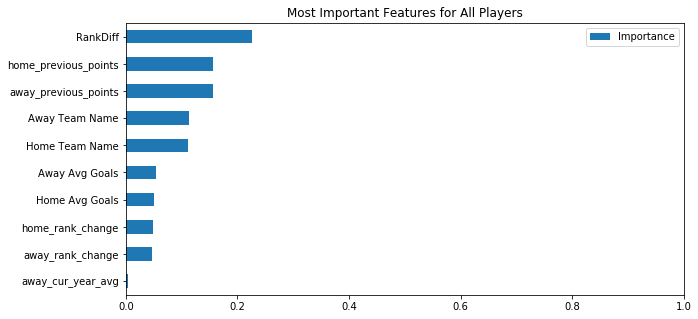

In [65]:
features['all'].head(10).sort_values(by='Importance').plot(kind='barh', 
                                                  figsize=(10,5), 
                                                  xlim=[0,1], 
                                                  title='Most Important Features for All Players')

---
get predicted match into format

In [67]:
fifa_ranking = pd.read_csv('fifa_rank_over_time.csv')

In [68]:
fifarank18 = fifa_ranking.iloc[57371:].drop(['country_abrv', 'confederation', 'rank_date'], axis=1).reset_index()

In [69]:
# need to add: Away Avg Goals and Home Avg Goals
def pred_match(team1, team2):
    # need to load this file from db
    # fifa_ranking = pd.read_csv('fifa_rank_over_time.csv')
    # fifarank18 = fifarank.iloc[57371:].drop(['country_abrv', 'confederation', 'rank_date'], axis=1).reset_index()

    home_team_rank = fifarank18.loc[fifarank18.country_full == team1].drop(
        'index', axis=1)
    away_team_rank = fifarank18.loc[fifarank18.country_full == team2].drop(
        'index', axis=1)

    home_team_rank.reset_index(drop=True, inplace=True)
    away_team_rank.reset_index(drop=True, inplace=True)

    match_pred = home_team_rank.join(
        away_team_rank, lsuffix='_home', rsuffix='_away')
    # add missing columns
    match_pred['Away Team Name'] = team2
    match_pred['Home Team Name'] = team1
    match_pred['RankDiff'] = match_pred.rank_home - match_pred.rank_away

    # select only necessay columns
    match_pred_2 = match_pred[['Away Team Name', 'Home Team Name', 'total_points_home', 'previous_points_home', 'rank_change_home', 'cur_year_avg_home',
                               'cur_year_avg_weighted_home', 'last_year_avg_home',
                               'last_year_avg_weighted_home', 'two_year_ago_avg_home',
                               'two_year_ago_weighted_home', 'three_year_ago_avg_home',
                               'three_year_ago_weighted_home', 'total_points_away', 'previous_points_away', 'rank_change_away',
                               'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
                               'last_year_avg_weighted_away', 'two_year_ago_avg_away',
                               'two_year_ago_weighted_away', 'three_year_ago_avg_away',
                               'three_year_ago_weighted_away', 'RankDiff']]

    # conform to train format
    match_pred_2.columns = ['Away Team Name', 'Home Team Name', 'home_total_points',
                            'home_previous_points', 'home_rank_change', 'home_cur_year_avg',
                            'home_cur_year_avg_weighted', 'home_last_year_avg',
                            'home_last_year_avg_weighted', 'home_two_year_ago_avg',
                            'home_two_year_ago_weighted', 'home_three_year_ago_avg',
                            'home_three_year_ago_weighted', 'away_total_points',
                            'away_previous_points', 'away_rank_change', 'away_cur_year_avg',
                            'away_cur_year_avg_weighted', 'away_last_year_avg',
                            'away_last_year_avg_weighted', 'away_two_year_ago_avg',
                            'away_two_year_ago_weighted', 'away_three_year_ago_avg',
                            'away_three_year_ago_weighted', 'RankDiff']

    return match_pred_2

In [70]:
test_mat = pred_match("Colombia", "Poland")

In [71]:
test_mat

,Away Team Name,Home Team Name,home_total_points,home_previous_points,home_rank_change,home_cur_year_avg,home_cur_year_avg_weighted,home_last_year_avg,home_last_year_avg_weighted,home_two_year_ago_avg,...,away_rank_change,away_cur_year_avg,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,RankDiff
0,Poland,Colombia,988.57,989,0,307.05,307.05,683.93,341.96,617.18,...,0,499.9,499.9,764.51,382.25,450.51,135.15,554.05,110.81,6


In [72]:
test_mat["Home Team Name"] = team_name_encoder.transform(test_mat["Home Team Name"])
test_mat["Away Team Name"] = team_name_encoder.transform(test_mat["Away Team Name"])

In [73]:
logreg2.predict_proba(test_mat) 

ValueError: X has 25 features per sample; expecting 27